# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# 최대 열 수 설정 df 출력시 특성이 짤리지 않음
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA결과를 바탕으로 데이터 전처리

In [ ]:
df = pd.read_csv('train.csv',index_col=0)

print(f'before preprocessing : {df.shape}')

# 불필요한 컬럼 제거
df.drop(columns=['id'], inplace=True)




# 정수형 변수 확인
integer_columns = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']


# 결측치 제거
df = df.dropna(axis = 0)
print(f'after remove nan datas : {df.shape}')



# 특정 행에 정수형 데이터 0이 포함되어있으면 해당 행 삭제
df = df[~df[integer_columns].apply(lambda row: (row == 0).any(), axis=1)]
print(f'after remove 0 data : {df.shape}')



# 모든 서비스에 대해 같은 점수를 매겼다면 해당 행 삭제
df = df[~df[integer_columns].apply(lambda row: row.nunique() == 1, axis=1)]
print(f'after remove unreliable data : {df.shape}')



# 범주형 데이터 인코딩 : 범주형같은 경우 one-hot encoding, label encoding으로 나뉜다
# 원핫인코딩은 unique 범주마다 column을 하나씩 부여, 라벨인코딩은 unique label마다 unique integer부여
# ex) 원핫 인코딩 : 사과 0, 바나나 0, 딸기 0, 수박 1     ||    라벨인코딩 : 과일 종류 : 3(=수박)
# 원핫인코딩을 하면 사용할 랜덤 포레스트에서 선택할 수 있는 갈림길이 많아지고,
# 원핫인코딩으로 인해 생기는 갈림길은 랜덤 포래스트 정확도에 악영향을 끼칠 것이라고 예상
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(le.classes_)


df

before preprocessing : (103904, 24)
after remove nan datas : (103594, 23)
after remove 0 data : (95415, 23)
after remove unreliable data : (95393, 23)
['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


<ipython-input-124-29a6081e6ff7>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-124-29a6081e6ff7>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-124-29a6081e6ff7>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


# 모델적용

In [ ]:
# satisfaction 값의 개수 출력
satisfaction_counts = df['satisfaction'].value_counts()
print("Satisfaction value counts:")
print(satisfaction_counts)

Satisfaction value counts:
satisfaction
0    54773
1    40620
Name: count, dtype: int64


Dataset size: (95393, 24)
Encoded satisfaction values:
{0: 0, 1: 1}
Training set size: (76314, 22)
Test set size: (19079, 22)
Accuracy: 0.9616856229362126
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10796
           1       0.97      0.94      0.96      8283

    accuracy                           0.96     19079
   macro avg       0.96      0.96      0.96     19079
weighted avg       0.96      0.96      0.96     19079

                              Feature  Importance
11                    Online boarding    0.181081
6               Inflight wifi service    0.112180
4                               Class    0.098797
3                      Type of Travel    0.094730
13             Inflight entertainment    0.077756
15                   Leg room service    0.045672
12                       Seat comfort    0.043759
1                       Customer Type    0.039572
5                     Flight Distance    0.03

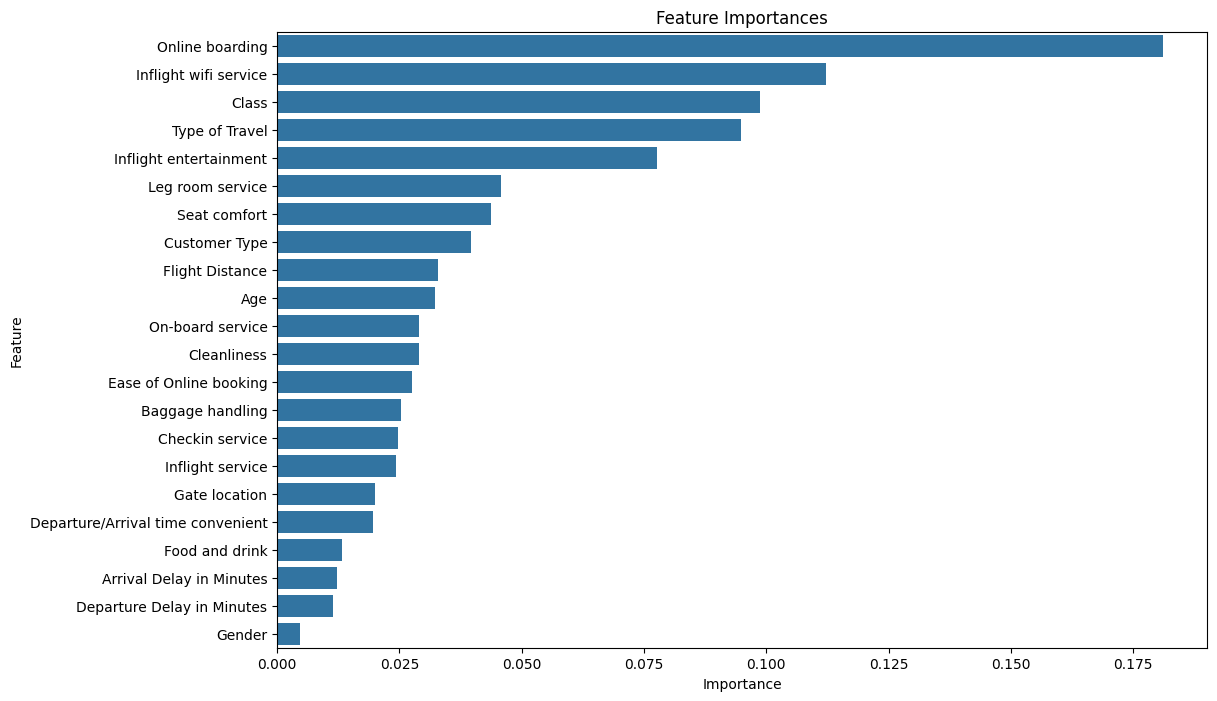

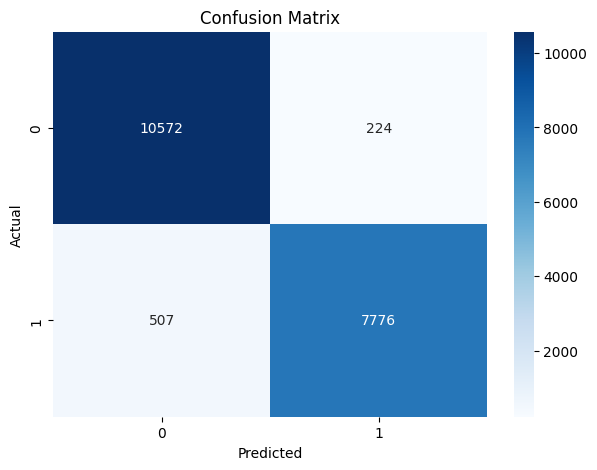

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 크기 확인
print(f"Dataset size: {df.shape}")

# satisfaction 컬럼 인코딩
label_encoder = LabelEncoder()
df.loc[:, 'satisfaction_encoded'] = label_encoder.fit_transform(df['satisfaction'])

# 인코딩된 값 확인
encoded_values = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("Encoded satisfaction values:")
print(encoded_values)

# 특성과 레이블 분리
X = df.drop(columns=['satisfaction', 'satisfaction_encoded'])
y = df['satisfaction_encoded']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# 랜덤 포레스트 모델 초기화 및 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 정확도 점수 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 특성 중요도 계산
importances = rf.feature_importances_

# 특성 중요도를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 출력
print(feature_importances)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
